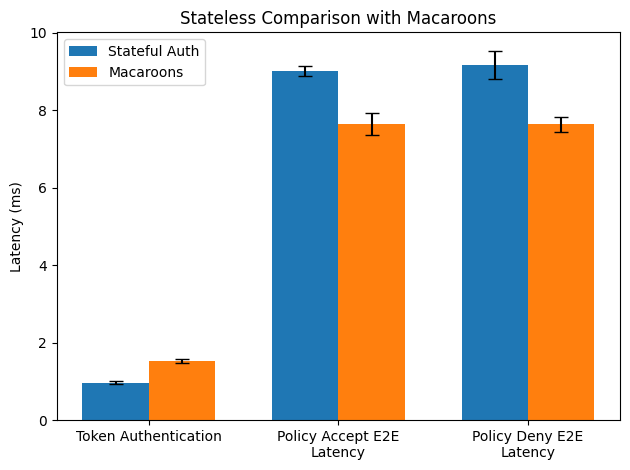

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

# Load the data
data = pd.read_csv('macaroon.csv')

# Grouping columns and calculating means and errors
means_macaroons = []
errors_macaroons = []
means_stateful_auth = []
errors_stateful_auth = []
custom_labels = ['Token Authentication', 'Policy Accept E2E Latency', 'Policy Deny E2E Latency']

# Select columns based on their index (0-indexed in Python)
macaroon_columns = [0, 2, 4]  # Columns 1, 3, 5
stateful_auth_columns = [1, 3, 5]  # Columns 2, 4, 6

# Compute means and errors for Macaroons
for i in macaroon_columns:
    means_macaroons.append(data.iloc[:, i].mean())
    errors_macaroons.append(data.iloc[:, i].std())

# Compute means and errors for Stateful Auth
for i in stateful_auth_columns:
    means_stateful_auth.append(data.iloc[:, i].mean())
    errors_stateful_auth.append(data.iloc[:, i].std())

# Create a bar graph
fig, ax = plt.subplots()
x = np.arange(len(custom_labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
bars1 = ax.bar(x - width/2, means_macaroons, width, yerr=errors_macaroons, label='Stateful Auth', capsize=5)
bars2 = ax.bar(x + width/2, means_stateful_auth, width, yerr=errors_stateful_auth, label='Macaroons', capsize=5)

ax.set_ylabel('Latency (ms)')
ax.set_title('Stateless Comparison with Macaroons')

# Wrap text for each label
wrapped_labels = ['\n'.join(wrap(label, 20)) for label in custom_labels]
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, rotation=0)  # No rotation, with text wrapping

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
